In [1]:
# if you run this and get any errors, it might mean that packages are not installed command out pip install and install all the packeges.

# !pip install --upgrade mssuite
# !pip install pandas
# !pip install numpy
# !pip install numpy
# !pip install matplotlib
# !pip install statsmodels
# !pip install scipy
# !pip install --upgrade git+https://github.com/science64/DynaTMT-py-SB.git # This is my repository (Süleyman) that I am updating!

import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import warnings
from statsmodels.stats.multitest import multipletests, local_fdr
from scipy.stats import zscore, uniform
import matplotlib.pyplot as plt
import DynaTMT_SB.DynaTMT as mePROD
#import mssuite.mssuite as ms

warnings.filterwarnings("ignore")

In [2]:
wd = "Example data" # you can define your folder here etc: C://Users/Jasmin/Desktop/JS55/fractionation/
dataName = "20200724_SB_CCCP+ISRIB_Import_PSMs.txt"

psms = pd.read_csv(f'{wd}/{dataName}', sep='\t', header=0) # TEXT or CSV file: you provide your .txt PSM or peptide file here.

# psms = pd.read_excel(f'{wd}/{dataName}', sep='\t', header=0) #  EXCEL file: you provide your .xlsx  PSM or peptide file here.

# print(psms.dtypes)

In [130]:
for column in psms.columns:
    unique_count = psms[column].nunique()
    print(f'{column}: {unique_count} unique values')

PSMs Workflow ID: 1 unique values
PSMs Peptide ID: 203381 unique values
Checked: 1 unique values
Confidence: 1 unique values
Identifying Node: 1 unique values
PSM Ambiguity: 1 unique values
Annotated Sequence: 78139 unique values
Modifications: 6226 unique values
# Proteins: 14 unique values
Master Protein Accessions: 7378 unique values
Protein Accessions: 7485 unique values
# Missed Cleavages: 3 unique values
Charge: 6 unique values
DeltaScore: 8865 unique values
DeltaCn: 1 unique values
Rank: 1 unique values
Search Engine Rank: 1 unique values
m/z [Da]: 198432 unique values
MH+ [Da]: 199790 unique values
Theo. MH+ [Da]: 74930 unique values
DeltaM [ppm]: 1620 unique values
Deltam/z [Da]: 1440 unique values
Activation Type: 1 unique values
MS Order: 1 unique values
Isolation Interference [%]: 111460 unique values
Average Reporter S/N: 3935 unique values
Ion Inject Time [ms]: 64478 unique values
RT [min]: 194839 unique values
First Scan: 80665 unique values
Spectrum File: 8 unique value

In [132]:
wd = r"C:\Users\Predator\PowerFolders\Import and Translation 2020Fasta\SB125-126 CCCP+ISRIB\Import" # you can define your folder here etc: C://Users/Jasmin/Desktop/JS55/fractionation/
dataName = "20200724_MAA_SB_126_CCCP+ISRIB_Import (_PeptideGroups.txt"

peptides = pd.read_csv(f'{wd}/{dataName}', sep='\t', header=0) # TEXT or CSV file: you provide your .txt PSM or peptide file here.


In [133]:
for column in peptides.columns:
    unique_count = peptides[column].nunique()
    print(f'{column}: {unique_count} unique values')

Peptide Groups Peptide Group ID: 92106 unique values
Checked: 1 unique values
Confidence: 1 unique values
Annotated Sequence: 54239 unique values
Modifications: 6161 unique values
Contaminant: 2 unique values
Qvality PEP: 5261 unique values
Qvality q-value: 386 unique values
# Protein Groups: 11 unique values
# Proteins: 15 unique values
# PSMs: 40 unique values
Master Protein Accessions: 7415 unique values
Positions in Master Proteins: 54184 unique values
Modifications in Master Proteins: 2 unique values
# Missed Cleavages: 3 unique values
Theo. MH+ [Da]: 74930 unique values
Abundances (Normalized): F2: 126, Sample: 21770 unique values
Abundances (Normalized): F2: 127N, Sample: 21063 unique values
Abundances (Normalized): F2: 127C, Sample: 21092 unique values
Abundances (Normalized): F2: 128N, Sample: 21104 unique values
Abundances (Normalized): F2: 128C, Sample: 21347 unique values
Abundances (Normalized): F2: 129N, Sample: 21310 unique values
Abundances (Normalized): F2: 129C, Sampl

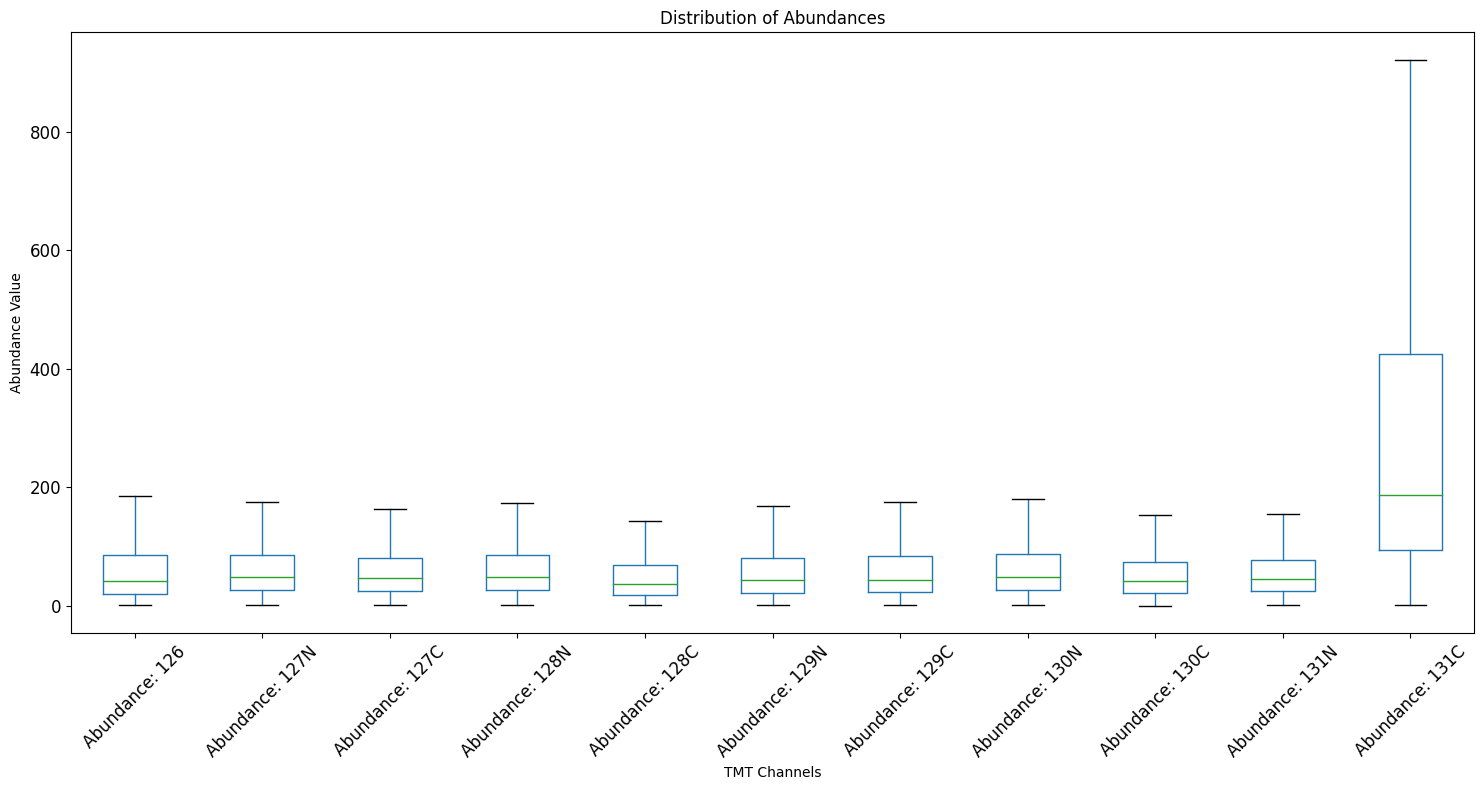

In [5]:
abundance_columns = [col for col in psms.columns if 'Abundance:' in col]
abundance_df = psms[abundance_columns]

# Displaying the first few rows of the extracted abundance columns
abundance_df.head()

# Plotting the abundance columns using a boxplot
plt.figure(figsize=(15, 8))
abundance_df.boxplot(grid=False, vert=True, fontsize=12, rot=45, showfliers=False)
plt.title("Distribution of Abundances")
plt.ylabel("Abundance Value")
plt.xlabel("TMT Channels")
plt.tight_layout()
plt.show()

In [5]:
# we are removing booster channel which is 131C
psms = psms.drop('Abundance: 131C', axis=1) #booster test we do not drop it

In [3]:
process = mePROD.PD_input() # we do not need to give our psms here anymore. Just define the Class called process here and we will use the functions from it!

# IT adjusment, you should do if you are using TMD method and using PSM file
IT_adjusted = process.IT_adjustment(psms)

# abundance_columns = [col for col in IT_adjusted.columns if 'Abundance:' in col]
# abundance_df = IT_adjusted[abundance_columns]

# # Displaying the first few rows of the extracted abundance columns
# abundance_df.head()

# # Plotting the abundance columns using a boxplot
# plt.figure(figsize=(15, 8))
# abundance_df.boxplot(grid=False, vert=True, fontsize=12, rot=45, showfliers=False)
# plt.title("Distribution of Abundances")
# plt.ylabel("Abundance Value")
# plt.xlabel("TMT Channels")
# plt.tight_layout()
# plt.show()

Calling function: IT_adjustment
IT adjustment done!


Calling function: filter_peptides
Filtering done!


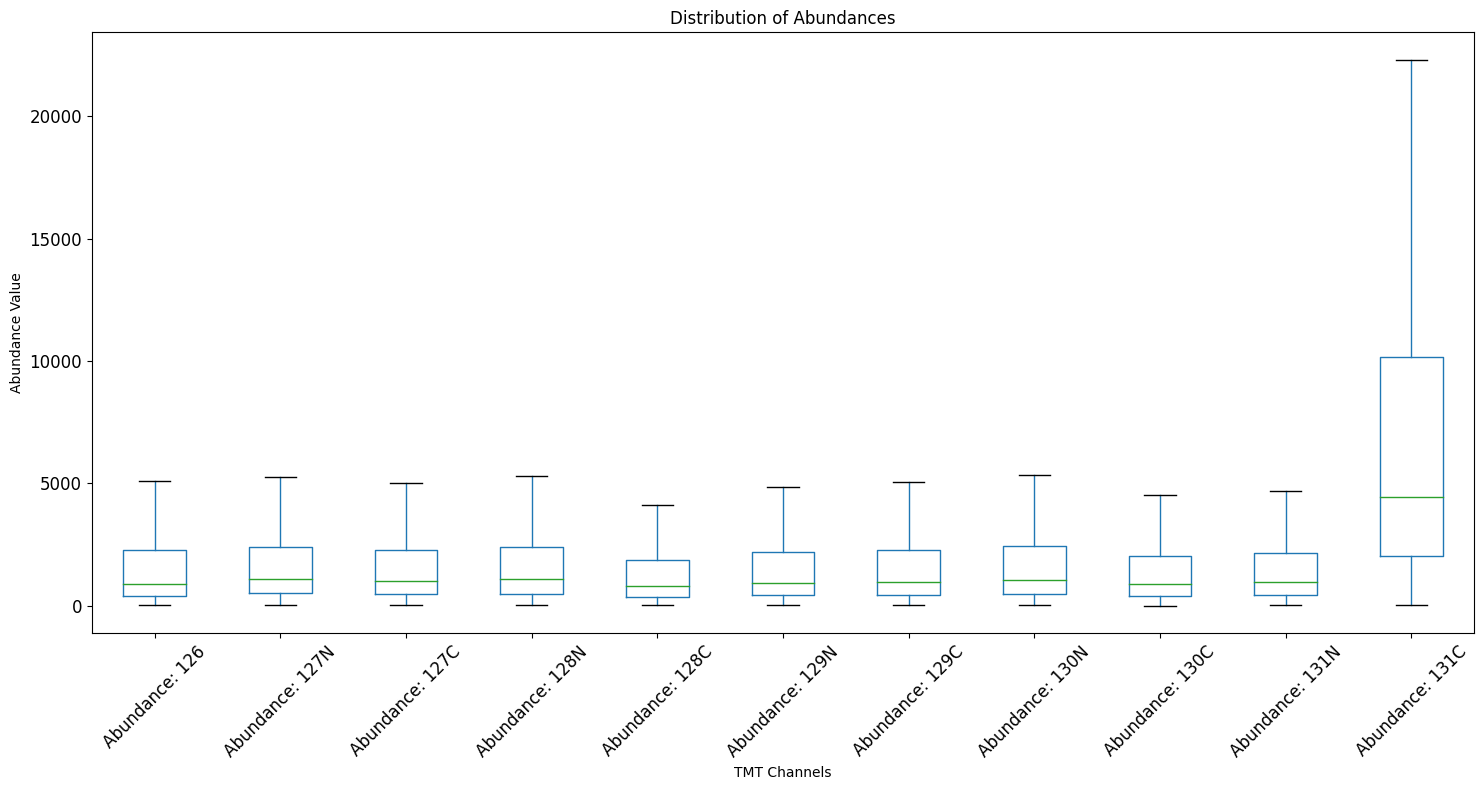

In [4]:
# it will filter peptides (PSMs) which contains empty values (complete empty values for entire TMT channels), contaminations and shared peptides (which contains ; in them).
filter_data = process.filter_peptides(IT_adjusted)

abundance_columns = [col for col in filter_data.columns if 'Abundance:' in col]
abundance_df = filter_data[abundance_columns]

# Displaying the first few rows of the extracted abundance columns
abundance_df.head()

# Plotting the abundance columns using a boxplot
plt.figure(figsize=(15, 8))
abundance_df.boxplot(grid=False, vert=True, fontsize=12, rot=45, showfliers=False)
plt.title("Distribution of Abundances")
plt.ylabel("Abundance Value")
plt.xlabel("TMT Channels")
plt.tight_layout()
plt.show()

Calling function: total_intensity_normalisation
Total intensity normalisation done!


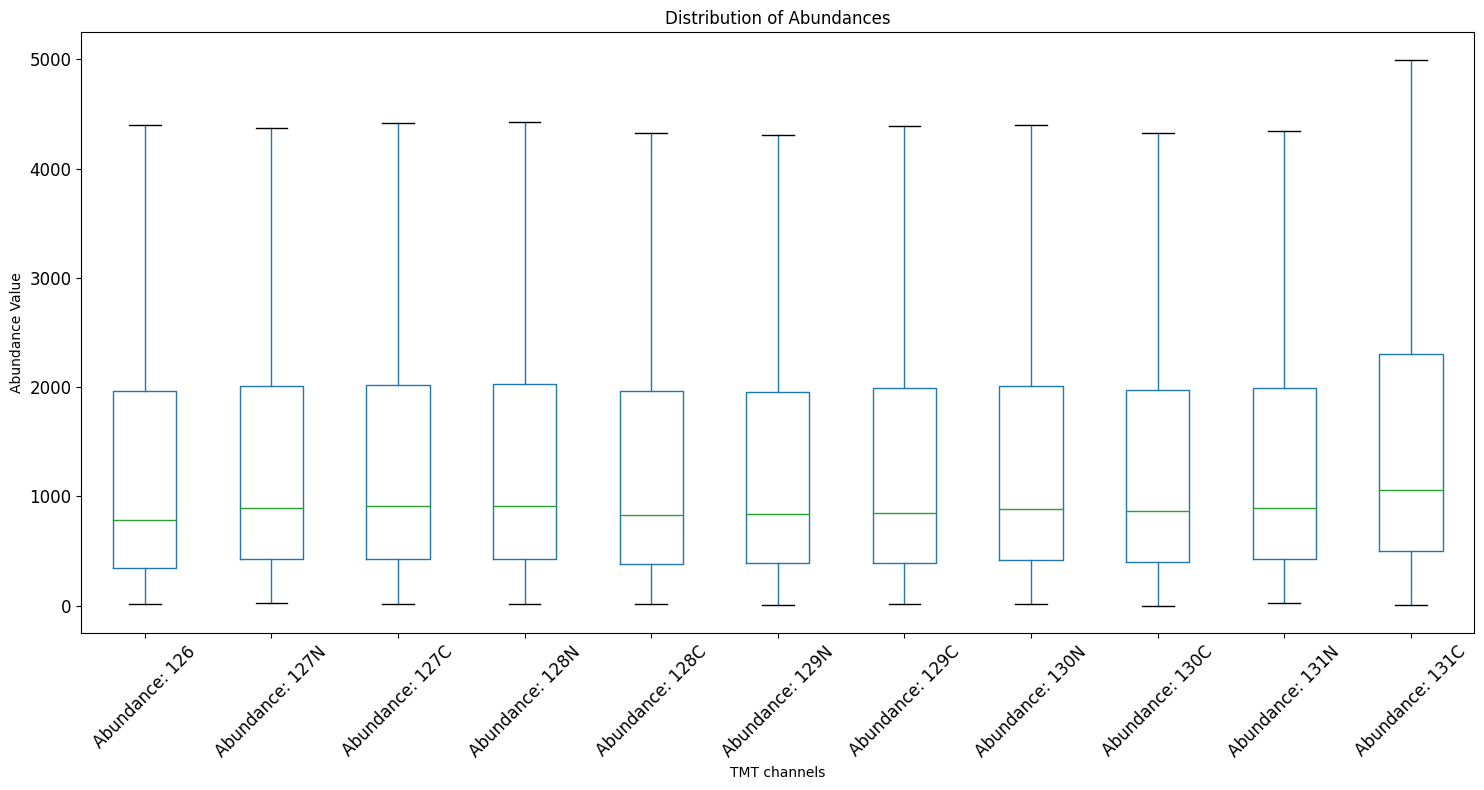

In [5]:
# for total intenstiy normalization
sumNorm = process.total_intensity_normalisation(filter_data)

abundance_columns = [col for col in sumNorm.columns if 'Abundance:' in col]
abundance_df = sumNorm[abundance_columns]

# Displaying the first few rows of the extracted abundance columns
abundance_df.head()

# Plotting the abundance columns using a boxplot
plt.figure(figsize=(15, 8))
abundance_df.boxplot(grid=False, vert=True, fontsize=12, rot=45, showfliers=False)
plt.title("Distribution of Abundances")
plt.ylabel("Abundance Value")
plt.xlabel("TMT channels")
plt.tight_layout()
plt.show()

Calling function: Median_normalisation
Median normalisation done!


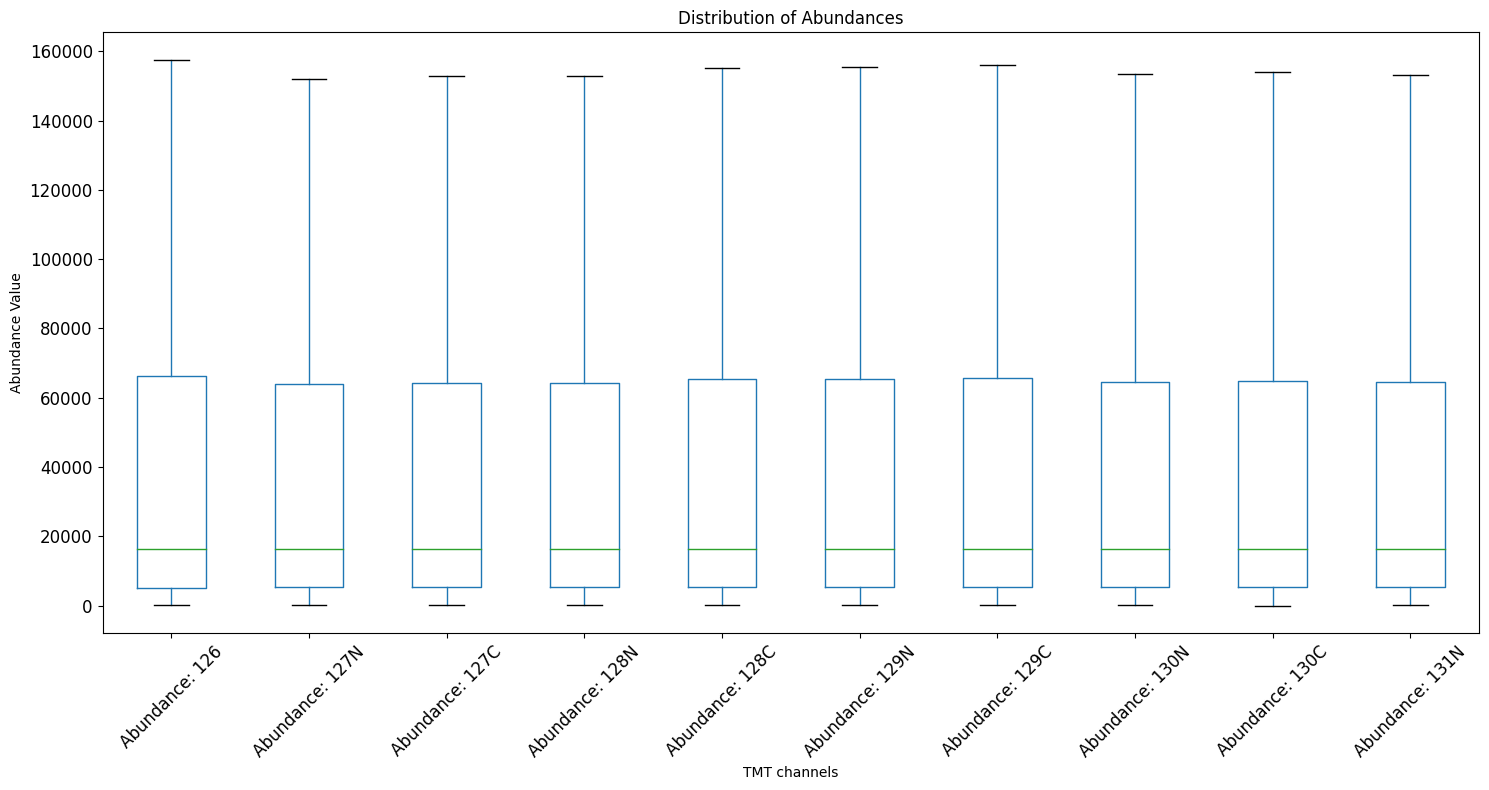

In [9]:
# for Median intenstiy normalization
medianNorm = process.Median_normalisation(filter_data)

abundance_columns = [col for col in medianNorm.columns if 'Abundance:' in col]
abundance_df = medianNorm[abundance_columns]

# Displaying the first few rows of the extracted abundance columns
abundance_df.head()

# Plotting the abundance columns using a boxplot
plt.figure(figsize=(15, 8))
abundance_df.boxplot(grid=False, vert=True, fontsize=12, rot=45, showfliers=False)
plt.title("Distribution of Abundances")
plt.ylabel("Abundance Value")
plt.xlabel("TMT channels")
plt.tight_layout()
plt.show()

Calling function: TMM
Normalization


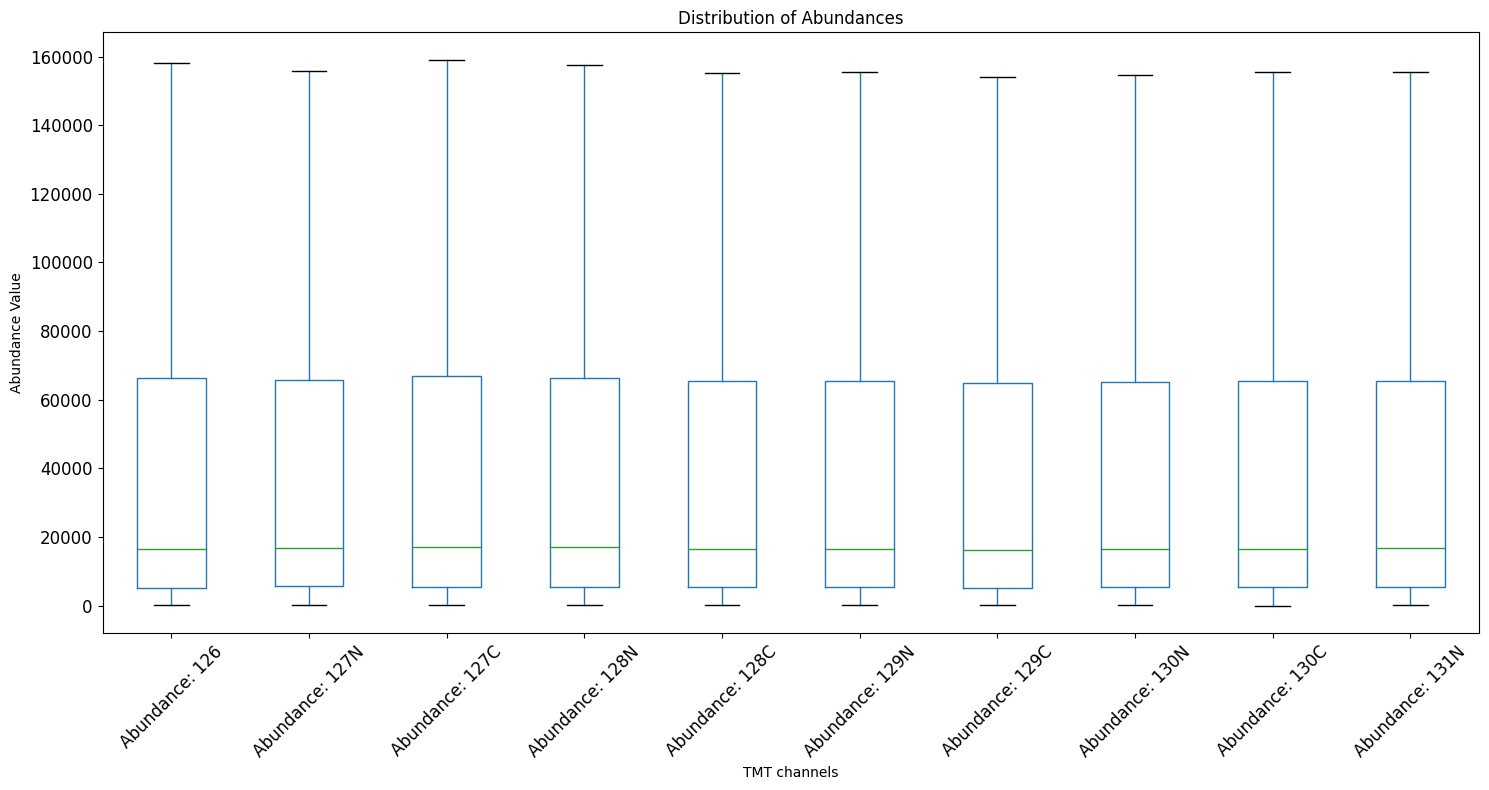

In [10]:
# for total TMM normalization (The Trimmed Mean of the M-values)
TMM_Norm = process.TMM(filter_data)

abundance_columns = [col for col in TMM_Norm.columns if 'Abundance:' in col]
abundance_df = TMM_Norm[abundance_columns]

# Displaying the first few rows of the extracted abundance columns
abundance_df.head()

# Plotting the abundance columns using a boxplot
plt.figure(figsize=(15, 8))
abundance_df.boxplot(grid=False, vert=True, fontsize=12, rot=45, showfliers=False)
plt.title("Distribution of Abundances")
plt.ylabel("Abundance Value")
plt.xlabel("TMT channels")
plt.tight_layout()
plt.show()

Calling function: extract_heavy
Extraction Done Extracted Heavy Peptides: 72814


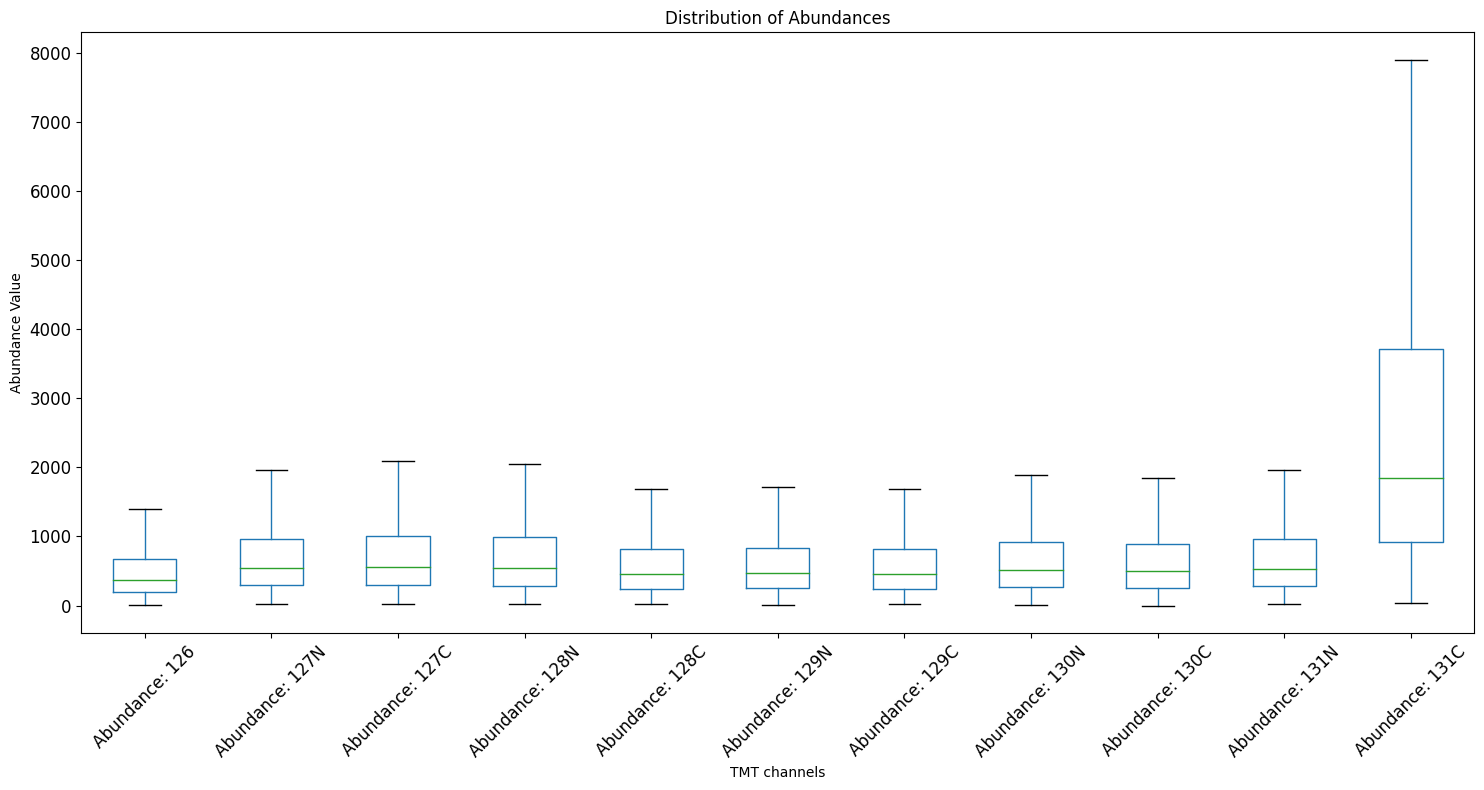

In [6]:
heavy = process.extract_heavy(sumNorm)
abundance_columns = [col for col in heavy.columns if 'Abundance:' in col]
abundance_df = heavy[abundance_columns]

# Displaying the first few rows of the extracted abundance columns
abundance_df.head()

# Plotting the abundance columns using a boxplot
plt.figure(figsize=(15, 8))
abundance_df.boxplot(grid=False, vert=True, fontsize=12, rot=45, showfliers=False)
plt.title("Distribution of Abundances")
plt.ylabel("Abundance Value")
plt.xlabel("TMT channels")
plt.tight_layout()
plt.show()

In [89]:
heavy

,PSMs Workflow ID,PSMs Peptide ID,Checked,Confidence,Identifying Node,PSM Ambiguity,Annotated Sequence,Modifications,# Proteins,Master Protein Accessions,...,Abundance: 129C,Abundance: 130N,Abundance: 130C,Abundance: 131N,Quan Info,XCorr,# Protein Groups,Contaminant,Percolator q-Value,Percolator PEP
1,-814,361,False,High,Sequest HT (A2),Unambiguous,[R].qNTDEHAr.[V],N-Term(TMT6plex); R8(Label:13C(6)15N(4)),1,Q8TCJ2,...,6184.657918,6362.616634,2359.079550,5972.661791,NaN,1.54,1,False,0.000089,1.759000e-03
6,-814,894,False,High,Sequest HT (A2),Unambiguous,[K].aTEEHSTr.[Q],N-Term(TMT6plex); R8(Label:13C(6)15N(4)),1,Q9NYF8,...,1737.536507,1327.026188,2255.383746,13008.588648,NaN,2.49,1,False,0.000553,6.554000e-03
13,-814,1120,False,High,Sequest HT (A2),Unambiguous,[R].qAQQEr.[D],N-Term(TMT6plex); R6(Label:13C(6)15N(4)),1,P35579,...,6488.423042,5983.466294,5573.649487,5841.394499,NaN,1.17,1,False,0.004953,8.003000e-02
15,-814,1161,False,High,Sequest HT (A2),Unambiguous,[R].qAQQEr.[D],N-Term(TMT6plex); R6(Label:13C(6)15N(4)),1,P35579,...,4289.163546,3412.353055,5158.866270,3898.638576,NaN,1.03,1,False,0.001733,4.377000e-02
20,-814,1648,False,High,Sequest HT (A2),Unambiguous,[R].rQHEAEEGVr.[R],N-Term(TMT6plex); R10(Label:13C(6)15N(4)),1,Q15149,...,546.777223,699.058438,1322.121506,1076.391795,NaN,2.79,1,False,0.002301,5.162000e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203365,-814,3728022,False,High,Sequest HT (A2),Unambiguous,[K].sVLLELTAALTEGVVNGk.[K],N-Term(TMT6plex); K18(TMTK8),1,O75616,...,4471.422621,5497.679922,4070.060323,5027.537288,NaN,2.50,1,False,0.000008,2.263000e-06
203367,-814,3728083,False,High,Sequest HT (A2),Unambiguous,[K].eVMLDAALALAAEISSk.[S],N-Term(TMT6plex); K17(TMTK8),1,Q13011,...,2931.971795,4535.061614,6902.637417,3112.900761,NaN,3.67,1,False,0.000008,1.562000e-10
203368,-814,3728194,False,High,Sequest HT (A2),Unambiguous,[K].eVMLDAALALAAEISSk.[S],N-Term(TMT6plex); K17(TMTK8),1,Q13011,...,352.367543,462.089476,648.098778,826.983940,NaN,1.08,1,False,0.001805,4.486000e-02
203370,-814,3728247,False,High,Sequest HT (A2),Unambiguous,[R].tALLDAAGVASLLTTAEVVVTEIPkEEk.[D],N-Term(TMT6plex); K25(TMTK8); K28(TMT6plex),1,P10809,...,656.132667,1066.360330,609.212851,971.377962,NaN,2.27,1,False,0.000008,8.630000e-05


Calling function: baseline_correction_peptide_return


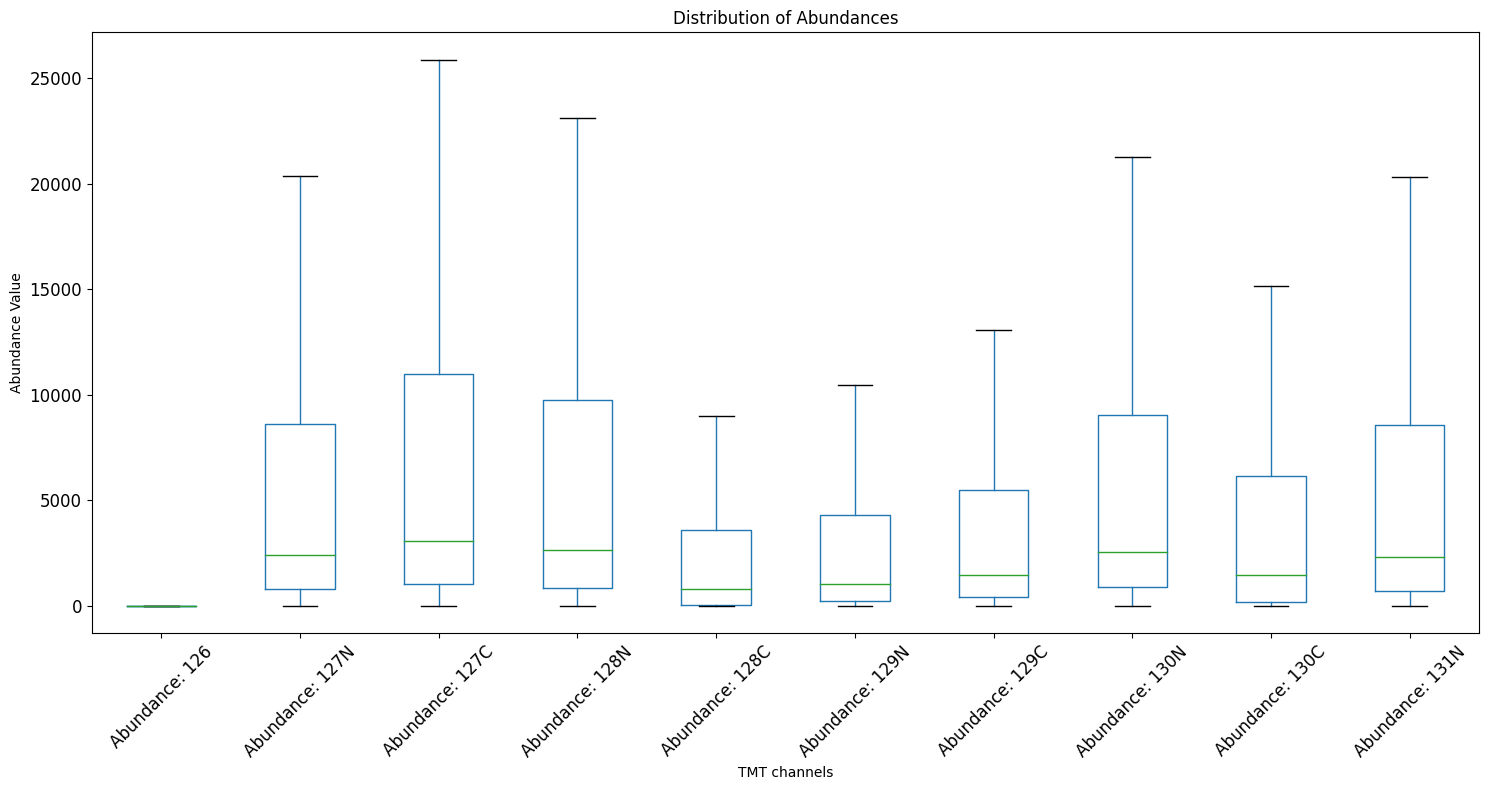

In [21]:
peptide_data = process.baseline_correction_peptide_return(heavy, random=True, threshold=5, i_baseline=0)

abundance_columns = [col for col in peptide_data.columns if 'Abundance:' in col]
abundance_df = peptide_data[abundance_columns]

# Displaying the first few rows of the extracted abundance columns
abundance_df.head()

# Plotting the abundance columns using a boxplot
plt.figure(figsize=(15, 8))
abundance_df.boxplot(grid=False, vert=True, fontsize=12, rot=45, showfliers=False)
plt.title("Distribution of Abundances")
plt.ylabel("Abundance Value")
plt.xlabel("TMT channels")
plt.tight_layout()
plt.show()

In [32]:
abundance_df

,Abundance: 126,Abundance: 127N,Abundance: 127C,Abundance: 128N,Abundance: 128C,Abundance: 129N,Abundance: 129C,Abundance: 130N,Abundance: 130C,Abundance: 131N
1,2785.585030,4308.101346,3161.045025,5201.821650,4610.600324,5971.519662,6184.657918,6362.616634,2359.079550,5972.661791
6,1942.887038,1390.445408,1498.662781,1448.168611,1311.519740,2498.887403,1737.536507,1327.026188,2255.383746,13008.588648
13,8040.743344,8285.686980,2770.637074,6974.380030,5327.203894,6030.178991,6488.423042,5983.466294,5573.649487,5841.394499
15,6226.601833,4684.205432,2002.414976,4309.749786,3393.726339,4458.108981,4289.163546,3412.353055,5158.866270,3898.638576
20,1638.579430,1116.915164,680.065464,2015.850706,838.290968,633.520750,546.777223,699.058438,1322.121506,1076.391795
...,...,...,...,...,...,...,...,...,...,...
203365,4623.134819,4695.602525,5062.709563,4738.407695,4515.954570,4986.042940,4471.422621,5497.679922,4070.060323,5027.537288
203367,1558.200484,2418.233211,4610.770716,4964.553958,1912.563698,3319.020162,2931.971795,4535.061614,6902.637417,3112.900761
203368,526.686245,729.413985,528.939805,949.998609,797.728502,950.281125,352.367543,462.089476,648.098778,826.983940
203370,795.881437,866.179107,1183.817659,834.145120,581.395349,1044.136051,656.132667,1066.360330,609.212851,971.377962


In [7]:
from scipy.stats import trim_mean
import pandas as pd
import numpy as np
import warnings
from numpy.random import random
random_float = np.random.RandomState(69)

def baseline_correction_peptide_returnNew(input_file, threshold=5, i_baseline=0,
                                       method = 'sum', random=False,
                                       include_negatives=False):
    print("Baseline correction new")
    channels = [col for col in input_file.columns if 'Abundance:' in col]

    if channels == []:
        channels = [col for col in input_file.columns if 'Abundance' in col]

    temp_data = input_file[channels]
    baseline_channel = channels[i_baseline]
    baseline = temp_data[baseline_channel]
    temp_data[channels] = temp_data[channels].subtract(baseline, axis='index')
    temp_data['Mean'] = temp_data[channels].mean(axis=1)

    # fix this part!
    if (include_negatives == False and random == False):
        temp_data[temp_data < 0] = 0  # replace negative abundances with 0
    elif (include_negatives == False and random == True):
        for channel in channels:
            temp_data[channel] = np.where(temp_data[channel] < 0, random_float.random_sample(size=len(temp_data)),
                                          temp_data[channel])
    elif include_negatives == True:
        pass
    else:
        pass

    if threshold is None:
        pass
    else:
        temp_data = temp_data.loc[temp_data['Mean'] >= threshold]  # set S/N threshold for each PSM

    input_file[channels] = temp_data[channels] # changing all the channels to the baseline corrected values

    # combine all the PSMs into peptides
    MPA = list([col for col in input_file.columns if 'Master Protein Accession' in col])[0]  # rereading the input file and finding MPA column

    protein_groups = input_file.groupby(by=[MPA], sort=False) # rereading the input file and grouping by protein accession

    results = {}
    for group in protein_groups.groups:
        temp_data = protein_groups.get_group(group)
        temp_data = temp_data[channels]

        if method == 'sum':
            temp_data = temp_data[channels].sum()
        elif method == 'mean':
            temp_data = temp_data[channels].mean()
        elif method == 'median':
            temp_data = temp_data[channels].median()
        else:
            temp_data = temp_data[channels].sum()

        results[group] = temp_data
    result_df = pd.DataFrame.from_dict(results, orient='index', columns=channels)
    input_file[channels] = result_df[channels]
    return input_file

In [8]:
# peptide_data2 = baseline_correction_peptide_returnNew(heavy, random=True, threshold=5, method = 'sum', i_baseline=0)

# abundance_columns = [col for col in peptide_data2.columns if 'Abundance:' in col]
# abundance_df = peptide_data2[abundance_columns]

# # Displaying the first few rows of the extracted abundance columns
# abundance_df.head()

input_file = heavy

channels = [col for col in input_file.columns if 'Abundance:' in col]

if channels == []:
    channels = [col for col in input_file.columns if 'Abundance' in col]

temp_data = input_file[channels +  ['PSMs Peptide ID']]







In [91]:
input_file

,PSMs Workflow ID,PSMs Peptide ID,Checked,Confidence,Identifying Node,PSM Ambiguity,Annotated Sequence,Modifications,# Proteins,Master Protein Accessions,...,Abundance: 129C,Abundance: 130N,Abundance: 130C,Abundance: 131N,Quan Info,XCorr,# Protein Groups,Contaminant,Percolator q-Value,Percolator PEP
1,-814,361,False,High,Sequest HT (A2),Unambiguous,[R].qNTDEHAr.[V],N-Term(TMT6plex); R8(Label:13C(6)15N(4)),1,Q8TCJ2,...,6184.657918,6362.616634,2359.079550,5972.661791,NaN,1.54,1,False,0.000089,1.759000e-03
6,-814,894,False,High,Sequest HT (A2),Unambiguous,[K].aTEEHSTr.[Q],N-Term(TMT6plex); R8(Label:13C(6)15N(4)),1,Q9NYF8,...,1737.536507,1327.026188,2255.383746,13008.588648,NaN,2.49,1,False,0.000553,6.554000e-03
13,-814,1120,False,High,Sequest HT (A2),Unambiguous,[R].qAQQEr.[D],N-Term(TMT6plex); R6(Label:13C(6)15N(4)),1,P35579,...,6488.423042,5983.466294,5573.649487,5841.394499,NaN,1.17,1,False,0.004953,8.003000e-02
15,-814,1161,False,High,Sequest HT (A2),Unambiguous,[R].qAQQEr.[D],N-Term(TMT6plex); R6(Label:13C(6)15N(4)),1,P35579,...,4289.163546,3412.353055,5158.866270,3898.638576,NaN,1.03,1,False,0.001733,4.377000e-02
20,-814,1648,False,High,Sequest HT (A2),Unambiguous,[R].rQHEAEEGVr.[R],N-Term(TMT6plex); R10(Label:13C(6)15N(4)),1,Q15149,...,546.777223,699.058438,1322.121506,1076.391795,NaN,2.79,1,False,0.002301,5.162000e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203365,-814,3728022,False,High,Sequest HT (A2),Unambiguous,[K].sVLLELTAALTEGVVNGk.[K],N-Term(TMT6plex); K18(TMTK8),1,O75616,...,4471.422621,5497.679922,4070.060323,5027.537288,NaN,2.50,1,False,0.000008,2.263000e-06
203367,-814,3728083,False,High,Sequest HT (A2),Unambiguous,[K].eVMLDAALALAAEISSk.[S],N-Term(TMT6plex); K17(TMTK8),1,Q13011,...,2931.971795,4535.061614,6902.637417,3112.900761,NaN,3.67,1,False,0.000008,1.562000e-10
203368,-814,3728194,False,High,Sequest HT (A2),Unambiguous,[K].eVMLDAALALAAEISSk.[S],N-Term(TMT6plex); K17(TMTK8),1,Q13011,...,352.367543,462.089476,648.098778,826.983940,NaN,1.08,1,False,0.001805,4.486000e-02
203370,-814,3728247,False,High,Sequest HT (A2),Unambiguous,[R].tALLDAAGVASLLTTAEVVVTEIPkEEk.[D],N-Term(TMT6plex); K25(TMTK8); K28(TMT6plex),1,P10809,...,656.132667,1066.360330,609.212851,971.377962,NaN,2.27,1,False,0.000008,8.630000e-05


In [108]:
temp_data

,Abundance: 126,Abundance: 127N,Abundance: 127C,Abundance: 128N,Abundance: 128C,Abundance: 129N,Abundance: 129C,Abundance: 130N,Abundance: 130C,Abundance: 131N,PSMs Peptide ID
1,2785.585030,4308.101346,3161.045025,5201.821650,4610.600324,5971.519662,6184.657918,6362.616634,2359.079550,5972.661791,361
6,1942.887038,1390.445408,1498.662781,1448.168611,1311.519740,2498.887403,1737.536507,1327.026188,2255.383746,13008.588648,894
13,8040.743344,8285.686980,2770.637074,6974.380030,5327.203894,6030.178991,6488.423042,5983.466294,5573.649487,5841.394499,1120
15,6226.601833,4684.205432,2002.414976,4309.749786,3393.726339,4458.108981,4289.163546,3412.353055,5158.866270,3898.638576,1161
20,1638.579430,1116.915164,680.065464,2015.850706,838.290968,633.520750,546.777223,699.058438,1322.121506,1076.391795,1648
...,...,...,...,...,...,...,...,...,...,...,...
203365,4623.134819,4695.602525,5062.709563,4738.407695,4515.954570,4986.042940,4471.422621,5497.679922,4070.060323,5027.537288,3728022
203367,1558.200484,2418.233211,4610.770716,4964.553958,1912.563698,3319.020162,2931.971795,4535.061614,6902.637417,3112.900761,3728083
203368,526.686245,729.413985,528.939805,949.998609,797.728502,950.281125,352.367543,462.089476,648.098778,826.983940,3728194
203370,795.881437,866.179107,1183.817659,834.145120,581.395349,1044.136051,656.132667,1066.360330,609.212851,971.377962,3728247


In [9]:
random = True
threshold = 5
method = 'sum'
include_negatives = False

In [10]:
i_baseline = 0
baseline_channel = channels[i_baseline]
baseline = temp_data[baseline_channel]
temp_data[channels] = temp_data[channels].subtract(baseline, axis='index')
temp_data

,Abundance: 126,Abundance: 127N,Abundance: 127C,Abundance: 128N,Abundance: 128C,Abundance: 129N,Abundance: 129C,Abundance: 130N,Abundance: 130C,Abundance: 131N,Abundance: 131C,PSMs Peptide ID
1,0.0,124.410090,21.360497,195.586263,168.748470,272.893184,260.226311,263.313849,-31.456557,258.977234,2052.560121,361
6,0.0,-45.195636,-40.749599,-41.001048,-46.069320,50.648432,-21.762780,-56.437998,28.817721,901.271253,1253.472981,894
13,0.0,19.877118,-439.095401,-89.841997,-199.311262,-151.876416,-145.493279,-195.637224,-193.649487,-181.407996,1703.204359,1120
15,0.0,-126.199115,-351.306248,-158.369352,-217.257182,-135.346705,-170.688801,-245.746739,-79.831784,-191.399194,789.242688,1161
20,0.0,-42.674153,-80.382004,30.081358,-61.885305,-80.863510,-90.835841,-80.023871,-23.960343,-46.258082,426.894776,1648
...,...,...,...,...,...,...,...,...,...,...,...,...
203365,0.0,5.839924,20.984575,7.624267,10.361810,40.023008,-25.200608,46.309514,-39.327467,31.707453,22.199067,3728022
203367,0.0,34.454298,115.688980,135.624290,18.176336,73.963118,50.956382,109.141973,219.141958,61.910395,840.208194,3728083
203368,0.0,16.562754,-1.378433,34.251022,25.540188,36.607765,-15.261526,-7.399652,10.865922,24.330361,124.269447,3728194
203370,0.0,5.732132,28.222117,2.811579,-15.075188,22.465901,-13.304203,17.228221,-14.380626,14.086986,38.167224,3728247


In [11]:
temp_data['Mean'] = temp_data[channels].mean(axis=1)

In [112]:
temp_data

,Abundance: 126,Abundance: 127N,Abundance: 127C,Abundance: 128N,Abundance: 128C,Abundance: 129N,Abundance: 129C,Abundance: 130N,Abundance: 130C,Abundance: 131N,PSMs Peptide ID,Mean
1,0.0,1522.516315,375.459995,2416.236620,1825.015294,3185.934631,3399.072888,3577.031603,-426.505480,3187.076760,361,1906.183863
6,0.0,-552.441630,-444.224257,-494.718427,-631.367298,556.000365,-205.350531,-615.860850,312.496708,11065.701610,894,899.023569
13,0.0,244.943636,-5270.106270,-1066.363315,-2713.539450,-2010.564354,-1552.320302,-2057.277050,-2467.093857,-2199.348846,1120,-1909.166981
15,0.0,-1542.396401,-4224.186857,-1916.852047,-2832.875494,-1768.492851,-1937.438286,-2814.248778,-1067.735563,-2327.963257,1161,-2043.218954
20,0.0,-521.664266,-958.513966,377.271277,-800.288462,-1005.058680,-1091.802207,-939.520991,-316.457923,-562.187634,1648,-581.822285
...,...,...,...,...,...,...,...,...,...,...,...,...
203365,0.0,72.467706,439.574743,115.272875,-107.180249,362.908120,-151.712199,874.545102,-553.074496,404.402468,3728022,145.720407
203367,0.0,860.032727,3052.570233,3406.353474,354.363214,1760.819678,1373.771311,2976.861130,5344.436933,1554.700278,3728083,2068.390898
203368,0.0,202.727739,2.253560,423.312363,271.042257,423.594880,-174.318702,-64.596769,121.412532,300.297695,3728194,150.572556
203370,0.0,70.297669,387.936222,38.263683,-214.486088,248.254614,-139.748770,270.478892,-186.668586,175.496524,3728247,64.982416


In [12]:
if threshold is None:
    pass
else:
    temp_data = temp_data.loc[temp_data['Mean'] >= threshold]  # set S/N threshold for each PSM
    temp_data = temp_data.drop("Mean", axis = 1)



In [114]:
temp_data

,Abundance: 126,Abundance: 127N,Abundance: 127C,Abundance: 128N,Abundance: 128C,Abundance: 129N,Abundance: 129C,Abundance: 130N,Abundance: 130C,Abundance: 131N,PSMs Peptide ID
1,0.0,1522.516315,375.459995,2416.236620,1825.015294,3185.934631,3399.072888,3577.031603,-426.505480,3187.076760,361
6,0.0,-552.441630,-444.224257,-494.718427,-631.367298,556.000365,-205.350531,-615.860850,312.496708,11065.701610,894
31,0.0,445.517038,637.617549,751.803718,466.618236,143.776900,230.477420,205.160577,433.971809,1020.003894,2142
48,0.0,6439.737714,8049.417920,6340.099527,3904.927236,3732.757373,3106.695082,5958.455530,6572.809860,7389.183813,2462
59,0.0,475.336848,-95.827881,133.322272,87.200798,388.482463,-51.473254,42.472192,73.338140,68.284340,2646
...,...,...,...,...,...,...,...,...,...,...,...
203365,0.0,72.467706,439.574743,115.272875,-107.180249,362.908120,-151.712199,874.545102,-553.074496,404.402468,3728022
203367,0.0,860.032727,3052.570233,3406.353474,354.363214,1760.819678,1373.771311,2976.861130,5344.436933,1554.700278,3728083
203368,0.0,202.727739,2.253560,423.312363,271.042257,423.594880,-174.318702,-64.596769,121.412532,300.297695,3728194
203370,0.0,70.297669,387.936222,38.263683,-214.486088,248.254614,-139.748770,270.478892,-186.668586,175.496524,3728247


In [ ]:
if (include_negatives == False and random == False):
    temp_data[temp_data < 0] = 0  # replace negative abundances with 0
    
elif (include_negatives == False and random == True):
    for channel in channels:
        temp_data[channel] = np.where(temp_data[channel] < 0, random_float.random_sample(size=len(temp_data)),
                                      temp_data[channel])
# elif (include_negatives == True and random == False):
#     pass
else: # for other conditions we are not doing anything.
    pass



# input_file[channels] = temp_data[channels] # changing all the channels to the baseline corrected values

In [59]:
random = False
threshold = 5
method = 'sum'
include_negatives = True

In [63]:
temp_data[temp_data < 0] = 0

In [65]:
temp_data['Mean2'] = temp_data[channels].mean(axis=1)

In [67]:
temp_data.loc[temp_data['Mean'] >= threshold] # 61819 peptides left with mean 1 

,Abundance: 126,Abundance: 127N,Abundance: 127C,Abundance: 128N,Abundance: 128C,Abundance: 129N,Abundance: 129C,Abundance: 130N,Abundance: 130C,Abundance: 131N,Mean,Mean2
1,0.0,1522.516315,375.459995,2416.236620,1825.015294,3185.934631,3399.072888,3577.031603,0.000000,3187.076760,1906.183863,1948.834411
6,0.0,0.000000,0.000000,0.000000,0.000000,556.000365,0.000000,0.000000,312.496708,11065.701610,899.023569,1193.419868
31,0.0,445.517038,637.617549,751.803718,466.618236,143.776900,230.477420,205.160577,433.971809,1020.003894,433.494714,433.494714
48,0.0,6439.737714,8049.417920,6340.099527,3904.927236,3732.757373,3106.695082,5958.455530,6572.809860,7389.183813,5149.408406,5149.408406
59,0.0,475.336848,0.000000,133.322272,87.200798,388.482463,0.000000,42.472192,73.338140,68.284340,112.113592,126.843705
...,...,...,...,...,...,...,...,...,...,...,...,...
203365,0.0,72.467706,439.574743,115.272875,0.000000,362.908120,0.000000,874.545102,0.000000,404.402468,145.720407,226.917101
203367,0.0,860.032727,3052.570233,3406.353474,354.363214,1760.819678,1373.771311,2976.861130,5344.436933,1554.700278,2068.390898,2068.390898
203368,0.0,202.727739,2.253560,423.312363,271.042257,423.594880,0.000000,0.000000,121.412532,300.297695,150.572556,174.464103
203370,0.0,70.297669,387.936222,38.263683,0.000000,248.254614,0.000000,270.478892,0.000000,175.496524,64.982416,119.072760


In [68]:
temp_data.loc[temp_data['Mean2'] >= threshold] # 71173 peptides left with mean 2

,Abundance: 126,Abundance: 127N,Abundance: 127C,Abundance: 128N,Abundance: 128C,Abundance: 129N,Abundance: 129C,Abundance: 130N,Abundance: 130C,Abundance: 131N,Mean,Mean2
1,0.0,1522.516315,375.459995,2416.236620,1825.015294,3185.934631,3399.072888,3577.031603,0.000000,3187.076760,1906.183863,1948.834411
6,0.0,0.000000,0.000000,0.000000,0.000000,556.000365,0.000000,0.000000,312.496708,11065.701610,899.023569,1193.419868
13,0.0,244.943636,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.494364
20,0.0,0.000000,0.000000,377.271277,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.727128
31,0.0,445.517038,637.617549,751.803718,466.618236,143.776900,230.477420,205.160577,433.971809,1020.003894,433.494714,433.494714
...,...,...,...,...,...,...,...,...,...,...,...,...
203365,0.0,72.467706,439.574743,115.272875,0.000000,362.908120,0.000000,874.545102,0.000000,404.402468,145.720407,226.917101
203367,0.0,860.032727,3052.570233,3406.353474,354.363214,1760.819678,1373.771311,2976.861130,5344.436933,1554.700278,2068.390898,2068.390898
203368,0.0,202.727739,2.253560,423.312363,271.042257,423.594880,0.000000,0.000000,121.412532,300.297695,150.572556,174.464103
203370,0.0,70.297669,387.936222,38.263683,0.000000,248.254614,0.000000,270.478892,0.000000,175.496524,64.982416,119.072760


In [14]:
for channel in channels:
    temp_data[channel] = np.where(temp_data[channel] < 0, random_float.random_sample(size=len(temp_data)),
                                  temp_data[channel])
temp_data

,Abundance: 126,Abundance: 127N,Abundance: 127C,Abundance: 128N,Abundance: 128C,Abundance: 129N,Abundance: 129C,Abundance: 130N,Abundance: 130C,Abundance: 131N,Abundance: 131C,PSMs Peptide ID
1,0.0,124.410090,21.360497,195.586263,168.748470,272.893184,260.226311,263.313849,0.962382,258.977234,2052.560121,361
6,0.0,0.275614,0.083967,0.418226,0.640232,50.648432,0.996515,0.590723,28.817721,901.271253,1253.472981,894
13,0.0,19.877118,0.567699,0.950460,0.702393,0.703018,0.863852,0.497923,0.319412,0.818937,1703.204359,1120
31,0.0,36.396579,46.516493,60.704976,45.482499,14.678219,14.568089,10.041097,37.942898,82.783373,269.594003,2142
48,0.0,526.412039,631.854710,515.663235,339.442197,314.730500,242.683225,455.967207,548.182082,601.948588,1372.633575,2462
...,...,...,...,...,...,...,...,...,...,...,...,...
203365,0.0,5.839924,20.984575,7.624267,10.361810,40.023008,0.412880,46.309514,0.612538,31.707453,22.199067,3728022
203367,0.0,34.454298,115.688980,135.624290,18.176336,73.963118,50.956382,109.141973,219.141958,61.910395,840.208194,3728083
203368,0.0,16.562754,0.754339,34.251022,25.540188,36.607765,0.287315,0.055784,10.865922,24.330361,124.269447,3728194
203370,0.0,5.732132,28.222117,2.811579,0.521304,22.465901,0.342092,17.228221,0.985820,14.086986,38.167224,3728247


In [75]:
# input_file[channels] = temp_data[channels] # this function is wrong!!!
# input_file

,PSMs Workflow ID,PSMs Peptide ID,Checked,Confidence,Identifying Node,PSM Ambiguity,Annotated Sequence,Modifications,# Proteins,Master Protein Accessions,...,Abundance: 129C,Abundance: 130N,Abundance: 130C,Abundance: 131N,Quan Info,XCorr,# Protein Groups,Contaminant,Percolator q-Value,Percolator PEP
1,-814,361,False,High,Sequest HT (A2),Unambiguous,[R].qNTDEHAr.[V],N-Term(TMT6plex); R8(Label:13C(6)15N(4)),1,Q8TCJ2,...,3399.072888,3577.031603,0.000000,3187.076760,NaN,1.54,1,False,0.000089,1.759000e-03
6,-814,894,False,High,Sequest HT (A2),Unambiguous,[K].aTEEHSTr.[Q],N-Term(TMT6plex); R8(Label:13C(6)15N(4)),1,Q9NYF8,...,0.000000,0.000000,312.496708,11065.701610,NaN,2.49,1,False,0.000553,6.554000e-03
13,-814,1120,False,High,Sequest HT (A2),Unambiguous,[R].qAQQEr.[D],N-Term(TMT6plex); R6(Label:13C(6)15N(4)),1,P35579,...,NaN,NaN,NaN,NaN,NaN,1.17,1,False,0.004953,8.003000e-02
15,-814,1161,False,High,Sequest HT (A2),Unambiguous,[R].qAQQEr.[D],N-Term(TMT6plex); R6(Label:13C(6)15N(4)),1,P35579,...,NaN,NaN,NaN,NaN,NaN,1.03,1,False,0.001733,4.377000e-02
20,-814,1648,False,High,Sequest HT (A2),Unambiguous,[R].rQHEAEEGVr.[R],N-Term(TMT6plex); R10(Label:13C(6)15N(4)),1,Q15149,...,NaN,NaN,NaN,NaN,NaN,2.79,1,False,0.002301,5.162000e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203365,-814,3728022,False,High,Sequest HT (A2),Unambiguous,[K].sVLLELTAALTEGVVNGk.[K],N-Term(TMT6plex); K18(TMTK8),1,O75616,...,0.000000,874.545102,0.000000,404.402468,NaN,2.50,1,False,0.000008,2.263000e-06
203367,-814,3728083,False,High,Sequest HT (A2),Unambiguous,[K].eVMLDAALALAAEISSk.[S],N-Term(TMT6plex); K17(TMTK8),1,Q13011,...,1373.771311,2976.861130,5344.436933,1554.700278,NaN,3.67,1,False,0.000008,1.562000e-10
203368,-814,3728194,False,High,Sequest HT (A2),Unambiguous,[K].eVMLDAALALAAEISSk.[S],N-Term(TMT6plex); K17(TMTK8),1,Q13011,...,0.000000,0.000000,121.412532,300.297695,NaN,1.08,1,False,0.001805,4.486000e-02
203370,-814,3728247,False,High,Sequest HT (A2),Unambiguous,[R].tALLDAAGVASLLTTAEVVVTEIPkEEk.[D],N-Term(TMT6plex); K25(TMTK8); K28(TMT6plex),1,P10809,...,0.000000,270.478892,0.000000,175.496524,NaN,2.27,1,False,0.000008,8.630000e-05


In [116]:
print(input_file.columns)
print(temp_data.columns)

print(input_file['PSMs Peptide ID'].nunique())
print(temp_data['PSMs Peptide ID'].nunique())

Index(['PSMs Workflow ID', 'PSMs Peptide ID', 'Checked', 'Confidence',
       'Identifying Node', 'PSM Ambiguity', 'Annotated Sequence',
       'Modifications', '# Proteins', 'Master Protein Accessions',
       'Protein Accessions', '# Missed Cleavages', 'Charge', 'DeltaScore',
       'DeltaCn', 'Rank', 'Search Engine Rank', 'm/z [Da]', 'MH+ [Da]',
       'Theo. MH+ [Da]', 'DeltaM [ppm]', 'Deltam/z [Da]', 'Activation Type',
       'MS Order', 'Isolation Interference [%]', 'Average Reporter S/N',
       'Ion Inject Time [ms]', 'RT [min]', 'First Scan', 'Spectrum File',
       'File ID', 'Abundance: 126', 'Abundance: 127N', 'Abundance: 127C',
       'Abundance: 128N', 'Abundance: 128C', 'Abundance: 129N',
       'Abundance: 129C', 'Abundance: 130N', 'Abundance: 130C',
       'Abundance: 131N', 'Quan Info', 'XCorr', '# Protein Groups',
       'Contaminant', 'Percolator q-Value', 'Percolator PEP'],
      dtype='object')
Index(['Abundance: 126', 'Abundance: 127N', 'Abundance: 127C',
       

In [15]:
# Merge input_file and temp_data on 'PSMs Peptide ID', keeping only the matched rows
merged = input_file.merge(temp_data[channels + ['PSMs Peptide ID']], 
                          on='PSMs Peptide ID', 
                          how='inner', 
                          suffixes=('', '_temp'))

In [16]:
# Remove the original channels columns from the merged DataFrame
merged.drop(columns=channels, inplace=True)

# Rename the channels_temp columns to channels
renamed_columns = {channel + '_temp': channel for channel in channels}
merged.rename(columns=renamed_columns, inplace=True)
merged

,PSMs Workflow ID,PSMs Peptide ID,Checked,Confidence,Identifying Node,PSM Ambiguity,Annotated Sequence,Modifications,# Proteins,Master Protein Accessions,...,Abundance: 127N,Abundance: 127C,Abundance: 128N,Abundance: 128C,Abundance: 129N,Abundance: 129C,Abundance: 130N,Abundance: 130C,Abundance: 131N,Abundance: 131C
0,-814,361,False,High,Sequest HT (A2),Unambiguous,[R].qNTDEHAr.[V],N-Term(TMT6plex); R8(Label:13C(6)15N(4)),1,Q8TCJ2,...,124.410090,21.360497,195.586263,168.748470,272.893184,260.226311,263.313849,0.962382,258.977234,2052.560121
1,-814,894,False,High,Sequest HT (A2),Unambiguous,[K].aTEEHSTr.[Q],N-Term(TMT6plex); R8(Label:13C(6)15N(4)),1,Q9NYF8,...,0.275614,0.083967,0.418226,0.640232,50.648432,0.996515,0.590723,28.817721,901.271253,1253.472981
2,-814,1120,False,High,Sequest HT (A2),Unambiguous,[R].qAQQEr.[D],N-Term(TMT6plex); R6(Label:13C(6)15N(4)),1,P35579,...,19.877118,0.567699,0.950460,0.702393,0.703018,0.863852,0.497923,0.319412,0.818937,1703.204359
3,-814,2142,False,High,Sequest HT (A2),Unambiguous,[K].aHEEANAAr.[K],N-Term(TMT6plex); R9(Label:13C(6)15N(4)),1,O43395,...,36.396579,46.516493,60.704976,45.482499,14.678219,14.568089,10.041097,37.942898,82.783373,269.594003
4,-814,2462,False,High,Sequest HT (A2),Unambiguous,[R].qrDPEDSQr.[T],N-Term(TMT6plex); R2(Label:13C(6)15N(4)); R9(L...,1,Q17RY6,...,526.412039,631.854710,515.663235,339.442197,314.730500,242.683225,455.967207,548.182082,601.948588,1372.633575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67786,-814,3728022,False,High,Sequest HT (A2),Unambiguous,[K].sVLLELTAALTEGVVNGk.[K],N-Term(TMT6plex); K18(TMTK8),1,O75616,...,5.839924,20.984575,7.624267,10.361810,40.023008,0.412880,46.309514,0.612538,31.707453,22.199067
67787,-814,3728083,False,High,Sequest HT (A2),Unambiguous,[K].eVMLDAALALAAEISSk.[S],N-Term(TMT6plex); K17(TMTK8),1,Q13011,...,34.454298,115.688980,135.624290,18.176336,73.963118,50.956382,109.141973,219.141958,61.910395,840.208194
67788,-814,3728194,False,High,Sequest HT (A2),Unambiguous,[K].eVMLDAALALAAEISSk.[S],N-Term(TMT6plex); K17(TMTK8),1,Q13011,...,16.562754,0.754339,34.251022,25.540188,36.607765,0.287315,0.055784,10.865922,24.330361,124.269447
67789,-814,3728247,False,High,Sequest HT (A2),Unambiguous,[R].tALLDAAGVASLLTTAEVVVTEIPkEEk.[D],N-Term(TMT6plex); K25(TMTK8); K28(TMT6plex),1,P10809,...,5.732132,28.222117,2.811579,0.521304,22.465901,0.342092,17.228221,0.985820,14.086986,38.167224


In [129]:
for column in merged.columns:
    unique_count = merged[column].nunique()
    print(f'{column}: {unique_count} unique values')

PSMs Workflow ID: 1 unique values
PSMs Peptide ID: 61819 unique values
Checked: 1 unique values
Confidence: 1 unique values
Identifying Node: 1 unique values
PSM Ambiguity: 1 unique values
Annotated Sequence: 31695 unique values
Modifications: 3402 unique values
# Proteins: 6 unique values
Master Protein Accessions: 5237 unique values
Protein Accessions: 5286 unique values
# Missed Cleavages: 3 unique values
Charge: 4 unique values
DeltaScore: 7765 unique values
DeltaCn: 1 unique values
Rank: 1 unique values
Search Engine Rank: 1 unique values
m/z [Da]: 60822 unique values
MH+ [Da]: 61027 unique values
Theo. MH+ [Da]: 27944 unique values
DeltaM [ppm]: 1328 unique values
Deltam/z [Da]: 1172 unique values
Activation Type: 1 unique values
MS Order: 1 unique values
Isolation Interference [%]: 33678 unique values
Average Reporter S/N: 2519 unique values
Ion Inject Time [ms]: 30296 unique values
RT [min]: 60994 unique values
First Scan: 44407 unique values
Spectrum File: 8 unique values
File

In [140]:
# combine all the PSMs into peptides
AnnotatedSeqs = list([col for col in merged.columns if 'Annotated Sequence' in col])[0]  # rereading the input file and finding Annotated Sequencecolumn

protein_groups = merged.groupby(by=[AnnotatedSeqs], sort = False) # rereading the input file and grouping by Annotated Sequence into single peptide

results = {} # this function is not working correctly!
for group in protein_groups.groups:
    temp_data = protein_groups.get_group(group)
    temp_data = temp_data[channels + ['PSMs Peptide ID']]

    if method == 'sum':
        temp_data = temp_data[channels].sum()
    elif method == 'mean':
        temp_data = temp_data[channels].mean()
    elif method == 'median':
        temp_data = temp_data[channels].median()
    else:
        temp_data = temp_data[channels].sum()

    results[group] = temp_data


In [150]:
temp_data[channels].sum()

Abundance: 126       0.000000
Abundance: 127N      0.175686
Abundance: 127C    156.799403
Abundance: 128N    548.612983
Abundance: 128C      0.968299
Abundance: 129N     48.674261
Abundance: 129C    672.109431
Abundance: 130N    364.544931
Abundance: 130C      0.481358
Abundance: 131N    496.551802
dtype: float64

In [17]:
# Select only the columns you want to keep
selected_columns = ['Master Protein Accessions', 'Annotated Sequence'] + channels
selected_df = merged[selected_columns]

# Group by 'Annotated Sequence' and 'Master Protein Accessions', and aggregate the sum for each abundance column
aggregated_df = (
    selected_df.groupby(['Master Protein Accessions', 'Annotated Sequence'])[channels]
    .agg('sum')
    .reset_index()
)

aggregated_df

,Master Protein Accessions,Annotated Sequence,Abundance: 126,Abundance: 127N,Abundance: 127C,Abundance: 128N,Abundance: 128C,Abundance: 129N,Abundance: 129C,Abundance: 130N,Abundance: 130C,Abundance: 131N,Abundance: 131C
0,A0A0B4J2D5,[K].eFHQAGkPIGLccIAPVLAAk.[V],0.0,66.806295,1.333951,140.145091,1.107708,106.348970,7.435914,98.915030,338.750496,63.791273,13063.735630
1,A0A0B4J2D5,[K].eVVEAHVDQk.[N],0.0,86.950374,88.491807,97.516403,0.472664,22.283525,9.885448,9.149695,0.144731,20.466379,1265.131459
2,A0A0B4J2D5,[K].iTDLANLSAANHDAAIFPGGFGAAk.[N],0.0,1029.784605,1203.583282,797.373069,237.160672,137.388008,296.220639,243.925923,533.278969,550.725285,17257.807039
3,A0A0B4J2D5,[K].nLSTFAVDGk.[D],0.0,82.881546,74.554013,44.069649,0.053221,9.095641,48.830326,31.708468,0.495877,13.326472,572.807954
4,A0A0B4J2D5,[R].gGAEVQIFAPDVPQMHVIDHTk.[G],0.0,426.149797,175.743110,337.503117,335.324442,1.103633,189.850034,23.266632,207.277038,244.902866,3723.035845
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33638,Q9Y6W3,[K].vYYPADPPPYIDGIr.[I],0.0,34.645919,47.889347,0.806977,0.007298,0.638277,24.658135,0.507371,0.357126,13.859861,1059.292401
33639,Q9Y6W5,[K].eEEVSLQGINTr.[K],0.0,58.017815,3.059214,37.144378,72.986794,40.041704,8.907741,55.703282,109.607648,96.644817,791.956472
33640,Q9Y6W5,[K].vTQLDPkEEEVSLQGINTr.[K],0.0,28.895803,379.495407,129.306932,138.850119,87.974194,85.923935,121.235345,150.447642,37.329956,828.424193
33641,Q9Y6W5,[R].sDLLSAIr.[Q],0.0,249.113716,455.219972,72.376970,187.839955,178.560587,316.278095,456.986011,185.854607,281.725129,5074.911805


In [154]:
for column in aggregated_df.columns:
    unique_count = aggregated_df[column].nunique()
    print(f'{column}: {unique_count} unique values')

Master Protein Accessions: 5237 unique values
Annotated Sequence: 31660 unique values
Abundance: 126: 1 unique values
Abundance: 127N: 31466 unique values
Abundance: 127C: 31429 unique values
Abundance: 128N: 31454 unique values
Abundance: 128C: 31415 unique values
Abundance: 129N: 31437 unique values
Abundance: 129C: 31427 unique values
Abundance: 130N: 31451 unique values
Abundance: 130C: 31511 unique values
Abundance: 131N: 31482 unique values


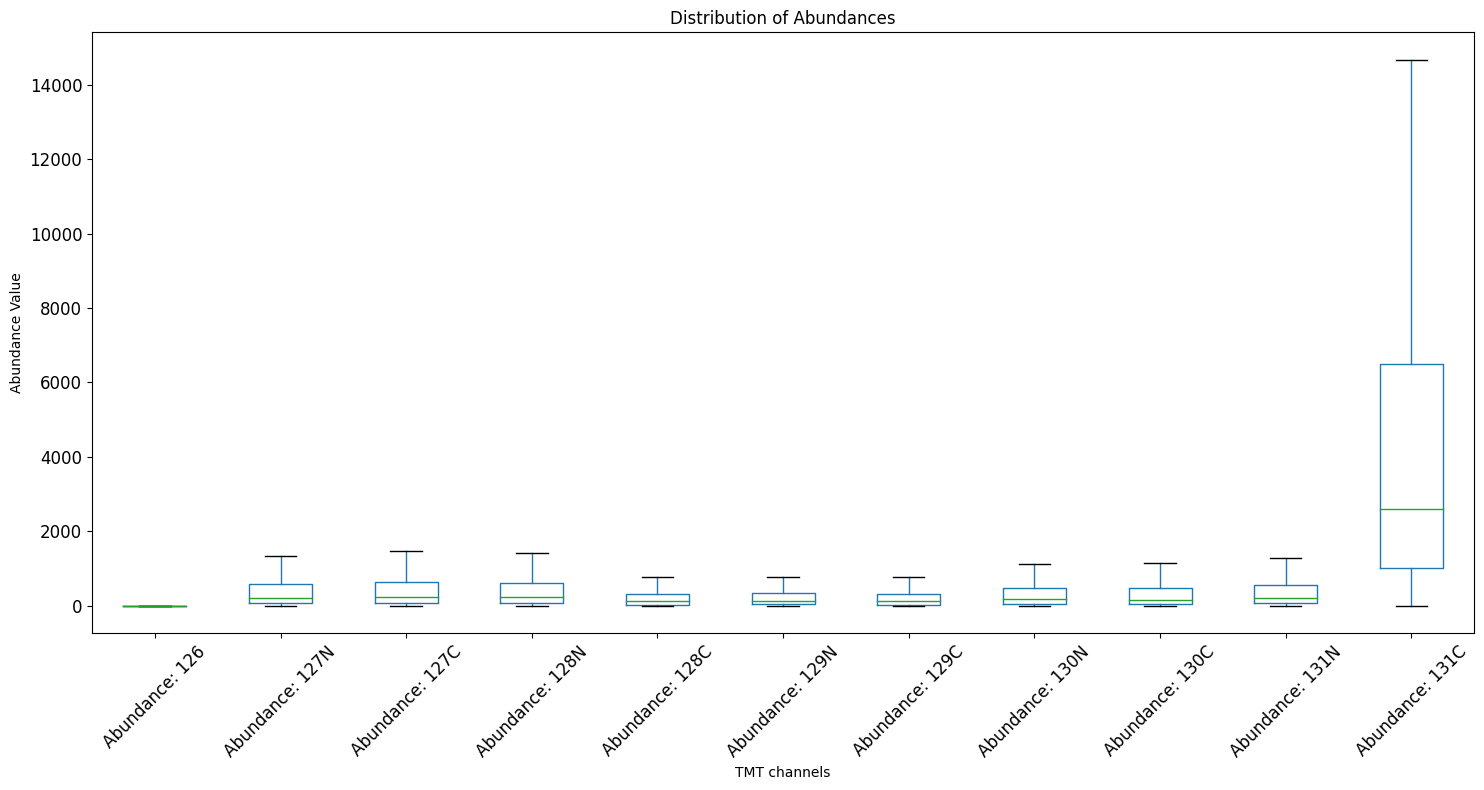

In [18]:
# Plotting the abundance columns using a boxplot
plt.figure(figsize=(15, 8))
aggregated_df[channels].boxplot(grid=False, vert=True, fontsize=12, rot=45, showfliers=False)
plt.title("Distribution of Abundances")
plt.ylabel("Abundance Value")
plt.xlabel("TMT channels")
plt.tight_layout()
plt.show()

In [19]:
# LMM continue with the data newly created with composed of peptide file

def protein_rollup_sum(input_file, channels):
    '''
    This function takes Peptide level (or PSM) dataframes and performs a sum based rollup to protein level.
    the channels variable takes an array of column names that contain the quantifictions. You can create such an
    array via this command:
    channels = [col for col in PSM.columns if 'Abundance:' in col]

    mpa1 variable contains a string that is included in the Accession column. The function will search for the column containing the string
    and use it for rollup.

    Returns Protein level DF.
    '''

    mpa1 = "Master Protein Accessions"
    print('Calculate Protein quantifications from PSM')
    mpa = [col for col in input_file.columns if mpa1 in col]
    mpa = mpa[0]

    PSM_grouped = input_file.groupby(by=[mpa])
    result = {}
    for group in PSM_grouped.groups:
        temp = PSM_grouped.get_group(group)
        sums = temp[channels].sum()
        result[group] = sums

    protein_df = pd.DataFrame.from_dict(
        result, orient='index', columns=channels)
    print("Combination done")

    return protein_df

def peptide_based_lmm(input_file, conditions, drop_missing=False, techreps=None, plexes=None, norm=None, pairs=None):

    columns =  [
        "Annotated Sequence",
        "Master Protein Accessions",
        "Abundance:"
    ]
    
    pair_names = []
    channels = [col for col in input_file.columns if columns[2] in col]
    if channels == []:
        channels = [col for col in input_file.columns if 'Abundance' in col]

    if norm is not None:
        #input_file = norm(Preprocessing(self.defaults), input_file, channels)
        pass
    else:
        if drop_missing == True:
            input_file = input_file.dropna(subset=channels)
        else:
            pass
        print('No Normalization applied')
    # Protein level quantifications
    # roll = Rollup(self.defaults)
    # protein_data = roll.protein_rollup_sum(
    #     input_file=input_file, channels=channels)
    
    protein_data = protein_rollup_sum(input_file, channels)

    

    columnDict = {channels[i]: conditions[i] for i in range(len(channels))}
    protein_data = protein_data.rename(columns=columnDict)

    # Drop rows where the sum across the row (excluding 'index' column) is 0
    # this is especially important because of mePROD and basal level substraction makes 0 for entire row
    protein_data = protein_data[protein_data.sum(axis=1) != 0]

    # Prepare Peptide data for LMM
    Peptides_for_LM = input_file[channels]

    sequence = [col for col in input_file.columns if columns[0] in col]

    sequence = sequence[0]

    Peptides_for_LM['Sequence'] = input_file[sequence]

    Acc = [col for col in input_file.columns if columns[1] in col]

    Acc = Acc[0]

    Peptides_for_LM['Accession'] = input_file[Acc]

    melted_Peptides = Peptides_for_LM.melt(
        id_vars=['Accession', 'Sequence'], value_vars=channels)
    # Replace column names with conditions

    if  techreps == None:
        pass
    else:
        melted_Peptides['Techreps' ] =melted_Peptides['variable']
        melted_Peptides['Techreps'].replace(to_replace=channels,
                                            value=techreps, inplace=True)

    if plexes == None:
        pass
    else:
        melted_Peptides['Multiplex' ] =melted_Peptides['variable']
        melted_Peptides['Multiplex'].replace(to_replace=channels,
                                             value=plexes, inplace=True)

    print('Total Number of Datapoints: ', len(melted_Peptides.index))

    melted_Peptides['variable'].replace(to_replace=channels,
                                        value=conditions, inplace=True)

    if pairs != None:
        for pair in pairs:
            if pair[0][0] < pair[1][0]: # pair = ['1CDDO', '0DMSO'] pair = ['CDDO', 'DMSO'] to assing FC correctly
                decisionOfColumnName = -1
            else:
                decisionOfColumnName = 1

            print(pair, 'and decision:', decisionOfColumnName)

            temp = melted_Peptides[(melted_Peptides['variable'].str.fullmatch(pair[0])) | (
                melted_Peptides['variable'].str.fullmatch(pair[1]))]

            temp['value'] = np.log2(temp['value'])
            temp = temp.dropna()

            grouped = temp.groupby(by=['Accession'])
            result_dict = {}
            fold_changes = []
            counter = 0

            for i in grouped.groups:

                temp2 = grouped.get_group(i)

                vc = {'Sequence': '0+Sequence'}

                # Base model
                model_form = "value ~ variable"

                model = smf.mixedlm(
                    model_form, temp2, groups='Sequence', vc_formula=vc)

                try:
                    result = model.fit()
                    if counter == 0:
                        # print(model_form)
                        # print(result.summary())
                        counter = counter + 1
                    else:
                        pass

                    fc = result.params[1] * decisionOfColumnName  # CDDO and DMSO change the order 1CDDO and 1DMSO
                    pval = result.pvalues[1]

                    fold_changes.append(fc)
                    result_dict[i] = pval
                except:
                    pass

            result_df_peptides_LMM = pd.DataFrame.from_dict(
                result_dict, orient='index', columns=['p_value'])

            result_df_peptides_LMM['fold_change'] = np.array(fold_changes)

            # Multiple testing correction:
            result_df_peptides_LMM['p_value'] = result_df_peptides_LMM['p_value'].fillna(
                value=1)
            pvals = result_df_peptides_LMM['p_value'].to_numpy()

            reject, pvals_corrected, a, b = multipletests(
                pvals, method='fdr_bh')

            result_df_peptides_LMM['q_value'] = pvals_corrected

            cols = ['fold_change', 'p_value', 'q_value']  # Changing columns index
            result_df_peptides_LMM = result_df_peptides_LMM[cols]

            result_df_peptides_LMM = result_df_peptides_LMM.rename(columns={'fold_change': f'log2({pair[0]}/{pair[1]})',
                                                                            'p_value': f'p_value {pair[0]}/{pair[1]}',
                                                                            'q_value': f'q_value {pair[0]}/{pair[1]}'})

            protein_data = protein_data.join(result_df_peptides_LMM)

    return protein_data


In [20]:
conditions = ['Light', 'DMSO', 'DMSO', 'DMSO', 'CCCP', 'CCCP', 'CCCP', 'CCCP_ISRIB', 'CCCP_ISRIB', 'CCCP_ISRIB', 'Booster']
pairs = [['CCCP', 'DMSO'], ['CCCP_ISRIB', 'DMSO'], ['CCCP_ISRIB', 'CCCP']]

resultFinal = peptide_based_lmm(aggregated_df, conditions, pairs=pairs)

# resultFinal

No Normalization applied
Calculate Protein quantifications from PSM
Combination done
Total Number of Datapoints:  370073
['CCCP', 'DMSO'] and decision: -1
['CCCP_ISRIB', 'DMSO'] and decision: -1
['CCCP_ISRIB', 'CCCP'] and decision: 1


In [21]:
resultFinal.reset_index(inplace=True)
resultFinal.rename(columns={'index': 'Accession'}, inplace=True)
# resultFinal

In [22]:
resultFinal.to_excel('Result_LMM_2023_peptides_withBooster.xlsx', index=False, engine="openpyxl")

In [ ]:
# Work on multicore whether it will be better or not!

In [ ]:
def chunks(l, n):
    """Yield successive n-sized chunks from l."""
    for i in range(0, len(l), n):
        yield l[i:i + n]

def peptide_based_lmm_multicore(input_file, conditions,number_of_processes=os.cpu_count()-2,drop_missing=False, techreps=None, plexes=None, pairs=None):
    psms=input_file
    gene_list = list(set(input_file["Master Protein Accessions"]))
    n_size = round(len(gene_list)/number_of_processes)
    accession_splits = list(chunks(gene_list, n_size))
    temp_dfs = []
    for i in range(len(accession_splits)):
        temp = psms[psms["Master Protein Accessions"].isin(values=accession_splits[i])]
        temp_dfs.append(temp)
    results=[]
    unique_conditions = list(set(conditions))
    if pairs == None:
        pairs = self.tessa(unique_conditions)
    else:
        pass
    for pair in pairs:
        pair.sort()
        comparison = '_' + str(pair[1]) + '_vs_' + str(pair[0])
        self.pair_names.append(comparison)
        

    with futures.ProcessPoolExecutor(max_workers=number_of_processes) as executor:
        future_to_df = {executor.submit(self.peptide_based_lmm,df,conditions, pairs=pairs,norm=None,drop_missing=drop_missing,techreps=techreps,plexes=plexes): df for df in temp_dfs}
        counter=0
        for future in futures.as_completed(future_to_df):
            counter = counter + 1
            result = future_to_df[future]
            try:
                data = future.result()
                print(data)
                results.append(data)
            except Exception as exc:
                print(exc)
            else:
                pass

    for i in range(len(results)):
        if i == 0:
            pass
        else:
            results[0]=results[0].append(results[i])
            print(len(results[0]))
    result = results[0]
    del results, temp_dfs
    self.comparison_data = self.export_comparison_strings()
    return result

In [8]:
defaults = ms.Defaults()
hypo = ms.HypothesisTesting(defaults)
conditions=['Light','0_DMSO','0_DMSO','0_DMSO','Tg','Tg','Tg','Boost']
pairs = [['0_DMSO','Tg']]

data = hypo.peptide_based_lmm_multicore(peptide_data,conditions=conditions,pairs=pairs,drop_missing=True)

521
783
1046
1307
1567


In [10]:
print(data.columns)

Index(['Abundance: 126', 'Abundance: 127N', 'Abundance: 127C',
       'Abundance: 128N', 'Abundance: 128C', 'Abundance: 129N',
       'Abundance: 129C', 'Abundance: 131N', 'p_value_Tg_vs_0_DMSO',
       'fold_change_Tg_vs_0_DMSO', 'q_value_Tg_vs_0_DMSO'],
      dtype='object')


In [11]:
data.to_excel(wd+"JS55_fractionation_LMM_results.xlsx",engine="openpyxl")